In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_classification 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time
%matplotlib inline

In [2]:
# Loading data
attendance_model_df = pd.read_csv("./Resources/attendance_demographic_location_model_data.csv")
attendance_model_df.head()

,year,month,member,zipcode,small_family_group,medium_family_group,large_family_group,adult,student,military,...,city_LINDON,city_NORTH SALT LAKE,city_HILL AFB,city_SPANISH FORK,city_SALEM,city_WOODS CROSS,city_CENTERVILLE,city_FARMINGTON,city_MAPLETON,city_GOSHEN
0,2022,2,0,84129,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,2,0,84129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,2,0,84129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,2,1,84010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,2,1,84010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Define features set
X = attendance_model_df.copy()
X.drop("member", axis=1, inplace=True)
X.head()

,year,month,zipcode,small_family_group,medium_family_group,large_family_group,adult,student,military,teen,...,city_LINDON,city_NORTH SALT LAKE,city_HILL AFB,city_SPANISH FORK,city_SALEM,city_WOODS CROSS,city_CENTERVILLE,city_FARMINGTON,city_MAPLETON,city_GOSHEN
0,2022,2,84129,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,2,84129,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2022,2,84129,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,2,84010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,2,84010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Define target vector
y = attendance_model_df["member"].ravel()
y[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [256]:
# define dataset for model. Full dataset = 606729, with target variable ('member' = 1) = 235697. 20%-30% of this subset = 47,139 - 70709
x, y = make_classification(n_samples=50000) 
smote = SMOTE() 
x_smote, y_smote = smote.fit_resample(x, y) 
  
# print the features and the labels 
print('x_smote:\n', x_smote) 
print('y_smote:\n', y_smote) 

x_smote:
 [[ 0.51577977 -1.44696312 -0.57091742 ...  1.51460489 -1.32685035
   1.29829403]
 [ 0.50583452  0.37758113 -1.62486073 ...  0.40567583  0.09661947
   0.30514311]
 [ 0.04840722  0.51270884 -0.28633772 ...  0.35770342  0.4120716
   0.22349403]
 ...
 [ 1.46100661 -0.73149875  0.23346212 ...  0.079331   -0.08622922
  -0.66781315]
 [-0.95691717  0.09066796  0.0336646  ...  0.71218288 -0.81127124
  -0.94427816]
 [-0.38947091  0.7676616  -1.23409434 ... -0.36486023 -0.71550398
  -0.71431635]]
y_smote:
 [0 1 0 ... 0 0 0]


In [246]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state=24)

In [247]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [273]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=30, max_depth=4, min_samples_split=8, min_samples_leaf=5, random_state=24)

In [274]:
# Fitting the model
start_time = time.time()

rf_model = rf_model.fit(X_train_scaled, y_train)

end_time = time.time()
print("Elapsed time: ", end_time - start_time)

Elapsed time:  2.635483503341675


In [275]:
# Making Predictions Using the testing data with the Random Forest Model
predictions = rf_model.predict(X_test_scaled)

In [276]:
# Get the feature importance array
importances = rf_model.feature_importances_

In [277]:
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.5735850596578863, 'maingroup_Salt Lake County'),
 (0.22831352889316564, 'zipcode'),
 (0.1265082102668627, 'child'),
 (0.06622681241912656, 'large_family_group'),
 (0.0008462888797001042, 'small_family_group'),
 (0.0007358280963463235, 'month'),
 (0.0007163839575433494, 'medium_family_group'),
 (0.0005786888897868816, 'city_BOUNTIFUL'),
 (0.0004507881671933738, 'city_WEST JORDAN'),
 (0.0004155598199044736, 'city_SALT LAKE CITY')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

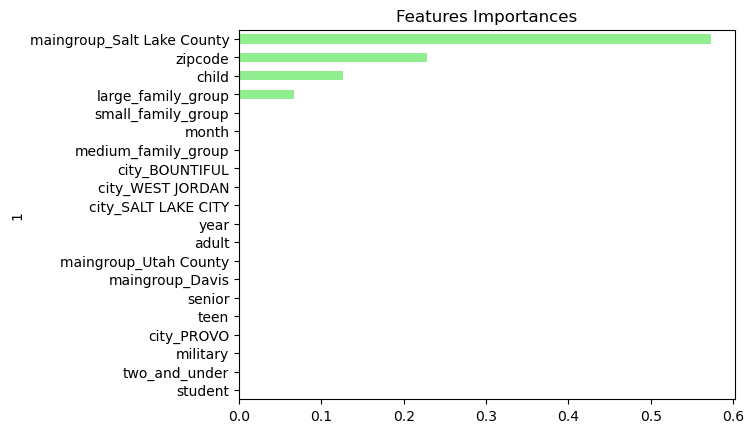

In [278]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [279]:
# Model Evaluation
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [280]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5792,465
Actual 1,154,6096


Accuracy Score : 0.9505077156792197
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6257
           1       0.93      0.98      0.95      6250

    accuracy                           0.95     12507
   macro avg       0.95      0.95      0.95     12507
weighted avg       0.95      0.95      0.95     12507

